<a href="https://colab.research.google.com/github/tzuyichao/python-basic/blob/master/colab/chapter4_policy_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline


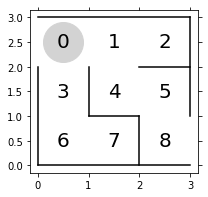

In [28]:
fig = plt.figure(figsize=(3, 3))

plt.plot([0, 3], [3, 3], color='k')
plt.plot([0, 3], [0, 0], color='k')
plt.plot([0, 0], [0, 2], color='k')
plt.plot([3, 3], [1, 3], color='k')
plt.plot([1, 1], [1, 2], color='k')
plt.plot([2, 3], [2, 2], color='k')
plt.plot([2, 1], [1, 1], color='k')
plt.plot([2, 2], [0, 1], color='k')

for i in range(3):
  for j in range(3):
    plt.text(0.5+i, 2.5-j, str(i+j*3), size=20, ha='center', va='center')
circle, = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markerSize=40)
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
plt.box('off')

In [3]:
theta_0 = np.array([
    [np.nan, 1, 1, np.nan],
    [np.nan, 1, 1, 1],
    [np.nan, np.nan, np.nan, 1],
    [1, np.nan, 1, np.nan],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, 1, 1],
    [1, 1, np.nan, np.nan],
    [np.nan, np.nan, np.nan, 1]
])

In [4]:
def get_pi(theta):
  [m, n] = theta.shape
  pi = np.zeros((m, n))
  exp_theta = np.exp(theta)
  for i in range(0, m):
    pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
  pi = np.nan_to_num(pi)
  return pi

pi_0 = get_pi(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


In [5]:
def get_a(pi, s):
  return np.random.choice([0, 1, 2, 3], p=pi[s])

def get_s_next(s, a):
  if a == 0:
    return s - 3
  elif a== 1:
    return s + 1
  elif a == 2:
    return s + 3
  elif a== 3:
    return s - 1
  
def play(pi):
  s = 0
  s_a_history = [[0, np.nan]]
  while True:
    a = get_a(pi, s)
    s_next = get_s_next(s, a)
    s_a_history[-1][1] = a
    s_a_history.append([s_next, np.nan])
    if s_next == 8:
      break;
    else:
      s = s_next
  return s_a_history

In [11]:
s_a_history = play(pi_0)
print(s_a_history)
print('1回合的步數:{}'.format(len(s_a_history)-1))

[[0, 2], [3, 0], [0, 2], [3, 0], [0, 1], [1, 2], [4, 1], [5, 2], [8, nan]]
1回合的步數:8


In [9]:
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


In [12]:
def update_theta(theta, pi, s_a_history):
  eta = 0.1
  total = len(s_a_history)
  [s_count, a_count] = theta.shape
  delta_theta = theta.copy()
  for i in range(0, s_count):
    for j in range(0, a_count):
      if not(np.isnan(theta[i, j])):
        sa_ij = [sa for sa in s_a_history if sa == [i, j]]
        n_ij = len(sa_ij)
        sa_i = [sa for sa in s_a_history if sa[0] == i]
        n_i = len(sa_i)
        delta_theta[i, j] = (n_ij + pi[i, j] * n_i)/total
  return theta + eta * delta_theta

In [13]:
stop_epsilon = 10**-4
theta = theta_0
pi = pi_0

for episode in range(10000):
  s_a_history = play(pi)
  theta = update_theta(theta, pi, s_a_history)
  pi_new = get_pi(theta)
  pi_delta = np.sum(np.abs(pi_new-pi))
  pi = pi_new
  print('回合: {}, 步數: {}'.format(episode, len(s_a_history)))
  if pi_delta < stop_epsilon:
    break


回合: 0, 步數: 23
回合: 1, 步數: 7
回合: 2, 步數: 29
回合: 3, 步數: 21
回合: 4, 步數: 85
回合: 5, 步數: 31
回合: 6, 步數: 63
回合: 7, 步數: 59
回合: 8, 步數: 59
回合: 9, 步數: 31
回合: 10, 步數: 99
回合: 11, 步數: 53
回合: 12, 步數: 19
回合: 13, 步數: 225
回合: 14, 步數: 7
回合: 15, 步數: 101
回合: 16, 步數: 13
回合: 17, 步數: 15
回合: 18, 步數: 75
回合: 19, 步數: 25
回合: 20, 步數: 55
回合: 21, 步數: 43
回合: 22, 步數: 71
回合: 23, 步數: 79
回合: 24, 步數: 15
回合: 25, 步數: 5
回合: 26, 步數: 29
回合: 27, 步數: 93
回合: 28, 步數: 15
回合: 29, 步數: 17
回合: 30, 步數: 51
回合: 31, 步數: 27
回合: 32, 步數: 9
回合: 33, 步數: 35
回合: 34, 步數: 93
回合: 35, 步數: 189
回合: 36, 步數: 23
回合: 37, 步數: 53
回合: 38, 步數: 43
回合: 39, 步數: 25
回合: 40, 步數: 43
回合: 41, 步數: 39
回合: 42, 步數: 155
回合: 43, 步數: 13
回合: 44, 步數: 29
回合: 45, 步數: 5
回合: 46, 步數: 5
回合: 47, 步數: 17
回合: 48, 步數: 13
回合: 49, 步數: 37
回合: 50, 步數: 19
回合: 51, 步數: 43
回合: 52, 步數: 31
回合: 53, 步數: 5
回合: 54, 步數: 47
回合: 55, 步數: 19
回合: 56, 步數: 15
回合: 57, 步數: 33
回合: 58, 步數: 11
回合: 59, 步數: 5
回合: 60, 步數: 11
回合: 61, 步數: 13
回合: 62, 步數: 9
回合: 63, 步數: 47
回合: 64, 步數: 19
回合: 65, 步數: 27
回合: 66, 步數: 5
回合: 67, 步數:

In [14]:
print(theta)
print(pi)

[[        nan 11.27511318  2.61302865         nan]
 [        nan  3.03809412 11.46916799  2.48230435]
 [        nan         nan         nan  2.94526015]
 [ 2.26138199         nan  2.0473561          nan]
 [ 2.70098431 11.37356601         nan         nan]
 [        nan         nan 10.06231774  2.52492547]
 [ 1.94426385  1.86698169         nan         nan]
 [        nan         nan         nan  1.83365008]]
[[0.00000000e+00 9.99827007e-01 1.72993328e-04 0.00000000e+00]
 [0.00000000e+00 2.17912524e-04 9.99657089e-01 1.24998777e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [5.53303156e-01 0.00000000e+00 4.46696844e-01 0.00000000e+00]
 [1.71187194e-04 9.99828813e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.99467499e-01 5.32501462e-04]
 [5.19310930e-01 4.80689070e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [29]:
def animate(i):
  state = s_a_history[i][0]
  circle.set_data((state%3) + 0.5, 2.5 - int(state/3))
  return circle

anim = animation.FuncAnimation(fig, animate, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

In [21]:
print(s_a_history)

[[0, 1], [1, 2], [4, 1], [5, 2], [8, nan]]
